**Introduction**

The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class. The classes include airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck. Each pixel in these images is represented by a number between 0 and 255 across three color channels: red, green, and blue. In this notebook, I aim to compare different manifold learning algorithms for visualizing the CIFAR-10 dataset in 2D.

**Data Preparation**

Load the CIFAR-10 dataset using torchvision.datasets and then applying algorithms on subset of 2000 images because the operation on all images is RAM and time consuming.

In [1]:
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

dataset = CIFAR10(root='data/', download=True, transform=ToTensor())
data = np.array([dataset[i][0].numpy().flatten() for i in range(len(dataset))])
labels = np.array([dataset[i][1] for i in range(len(dataset))])

num_samples = 2000
indices = np.random.choice(len(data), num_samples, replace=False)
data_subset = data[indices]
labels_subset = labels[indices]

Files already downloaded and verified


In [2]:
# Applying function to plot the 2D embeddings instead of plotting 7 times individually
def plot_embedding(embedding, labels, title):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='tab10', alpha=0.6)
    plt.legend(handles=scatter.legend_elements()[0], labels=[dataset.classes[i] for i in range(10)])
    plt.title(title)
    plt.show()

**Manifold Learning Algorithms**

Then, I explored the following manifold learning algorithms:

Principal Component Analysis (PCA)
Isomap Embedding
Locally Linear Embedding (LLE)
Multidimensional Scaling (MDS)
Spectral Embedding
t-Distributed Stochastic Neighbor Embedding (t-SNE)
Uniform Manifold Approximation and Projection (UMAP)

Each algorithm will be used to project the CIFAR-10 data into 2D, and the results will be visualized with the data points colored by their class labels.

PCA is a linear dimensionality reduction technique that projects the data onto the directions of maximum variance.

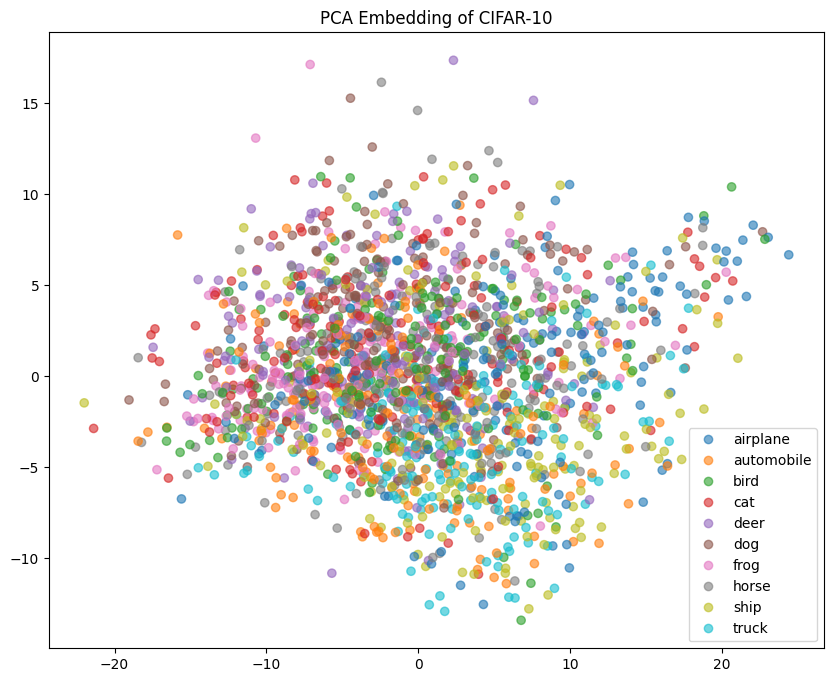

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_embedding = pca.fit_transform(data_subset)
plot_embedding(pca_embedding, labels_subset, 'PCA Embedding of CIFAR-10')

**Isomap Embedding**

Isomap is a nonlinear dimensionality reduction method that preserves the geodesic distances between the data points.

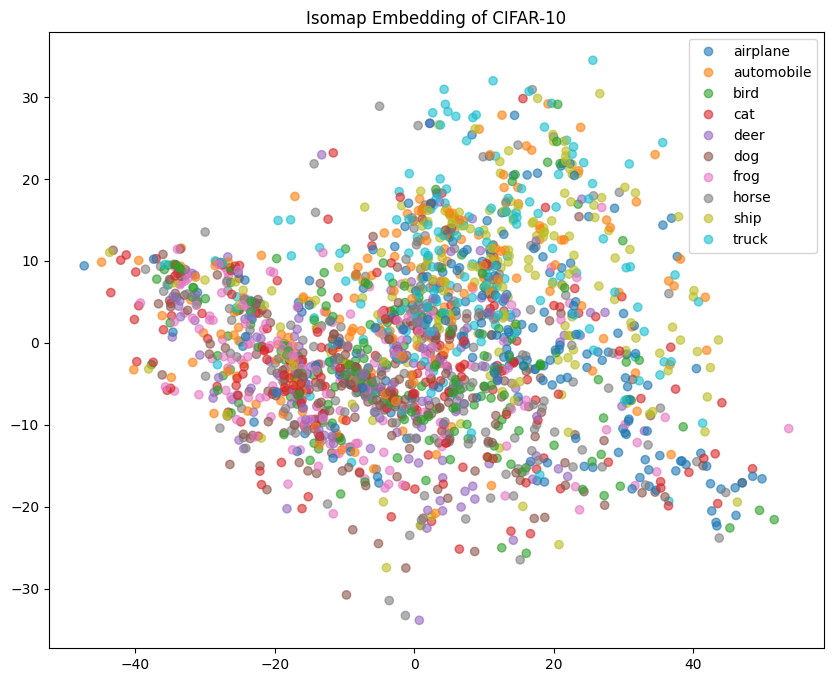

In [4]:
from sklearn.manifold import Isomap
isomap = Isomap(n_components=2)
isomap_embedding = isomap.fit_transform(data_subset)
plot_embedding(isomap_embedding, labels_subset, 'Isomap Embedding of CIFAR-10')

**Locally Linear Embedding (LLE)**

LLE is a nonlinear technique that preserves local distances by reconstructing each data point as a linear combination of its neighbors.

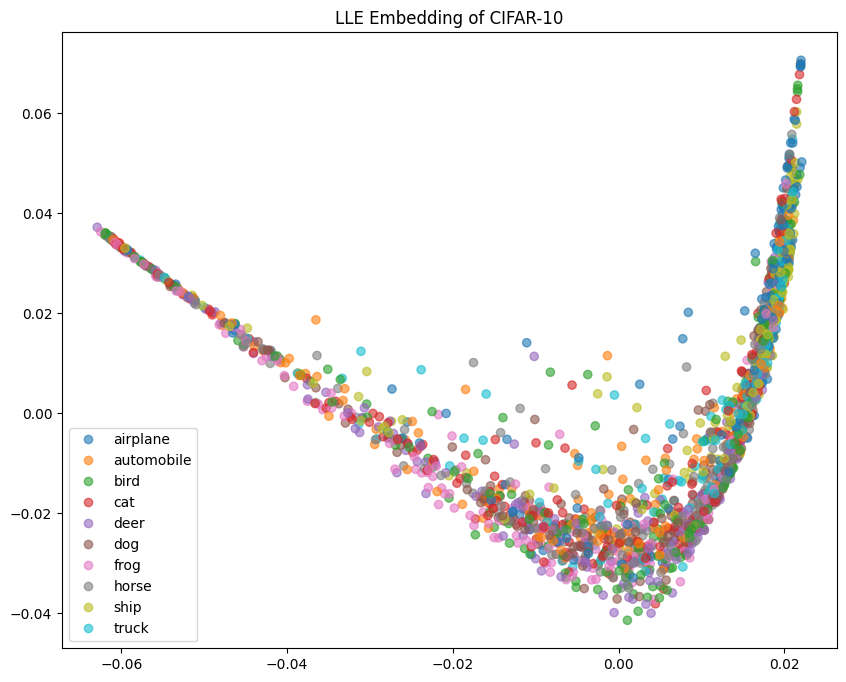

In [5]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2)
lle_embedding = lle.fit_transform(data_subset)
plot_embedding(lle_embedding, labels_subset, 'LLE Embedding of CIFAR-10')

**Multidimensional Scaling (MDS)**

MDS is a technique that aims to place the data points in a low-dimensional space while preserving the pairwise distances as much as possible.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


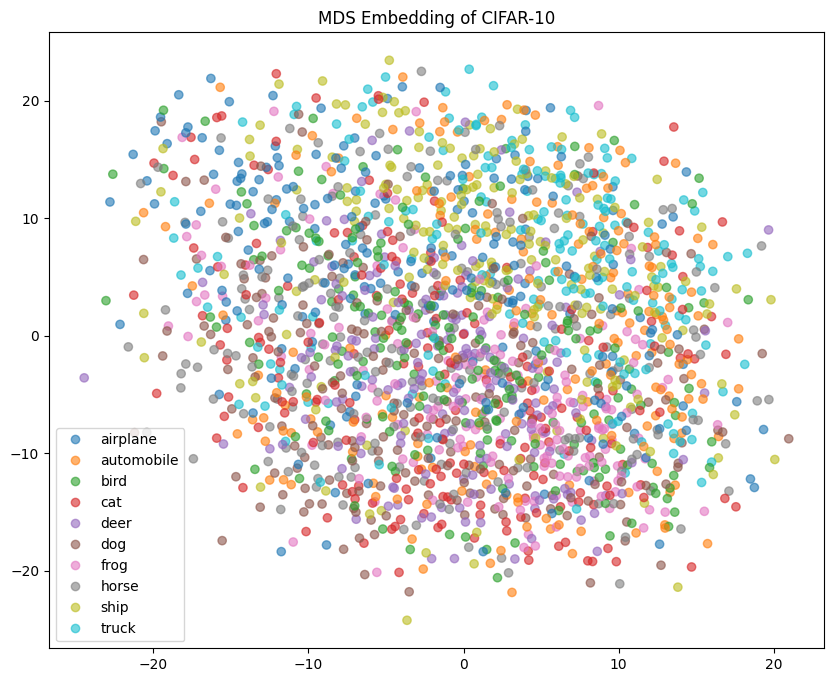

In [6]:
from sklearn.manifold import MDS
mds = MDS(n_components=2)
mds_embedding = mds.fit_transform(data_subset)
plot_embedding(mds_embedding, labels_subset, 'MDS Embedding of CIFAR-10')

**Spectral Embedding**

Spectral Embedding is a nonlinear technique that uses the eigenvalues of the graph Laplacian to perform dimensionality reduction.

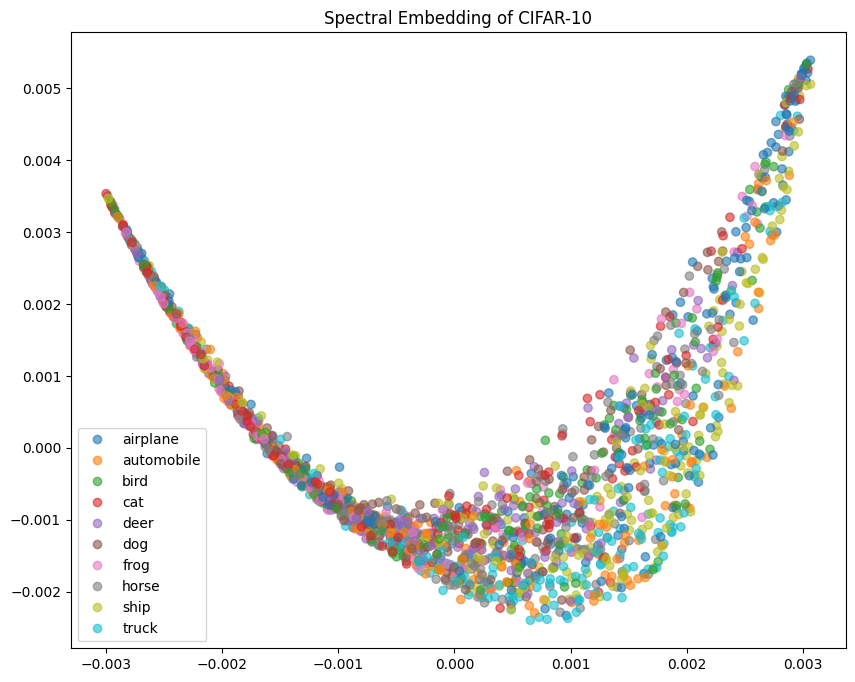

In [8]:
from sklearn.manifold import SpectralEmbedding
spectral = SpectralEmbedding(n_components=2)
spectral_embedding = spectral.fit_transform(data_subset)
plot_embedding(spectral_embedding, labels_subset, 'Spectral Embedding of CIFAR-10')

**t-Distributed Stochastic Neighbor Embedding (t-SNE)**

t-SNE is a popular nonlinear technique that is particularly well suited for the visualization of high-dimensional datasets.

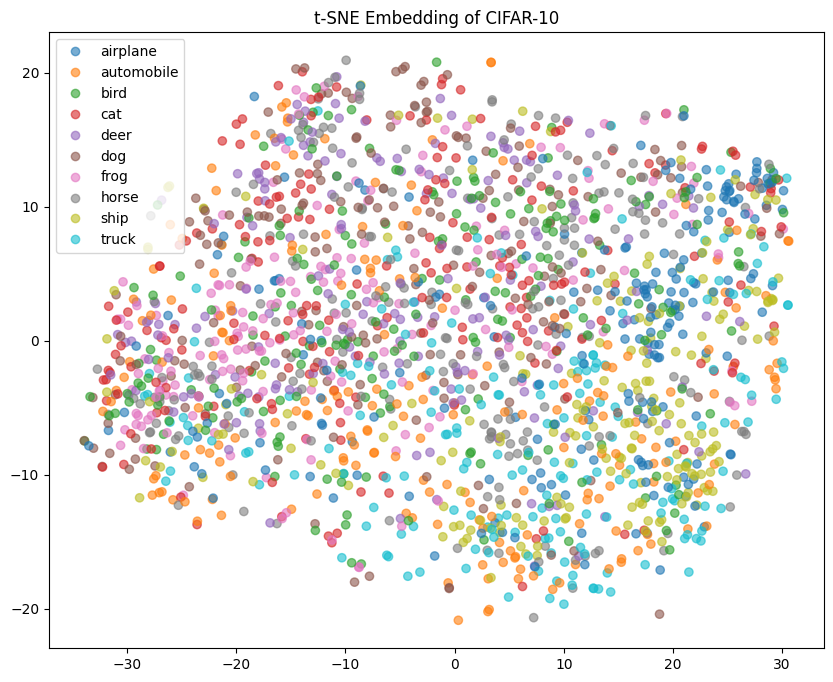

In [9]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
tsne_embedding = tsne.fit_transform(data_subset)
plot_embedding(tsne_embedding, labels_subset, 't-SNE Embedding of CIFAR-10')

**Uniform Manifold Approximation and Projection (UMAP)**

UMAP is a relatively new, nonlinear dimensionality reduction technique that is effective at preserving both local and global structures in the data.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 4.7 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=68cc788aacb9dd3fddd316858f0799387d37e2c401963dfa96e8741a58482a13
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


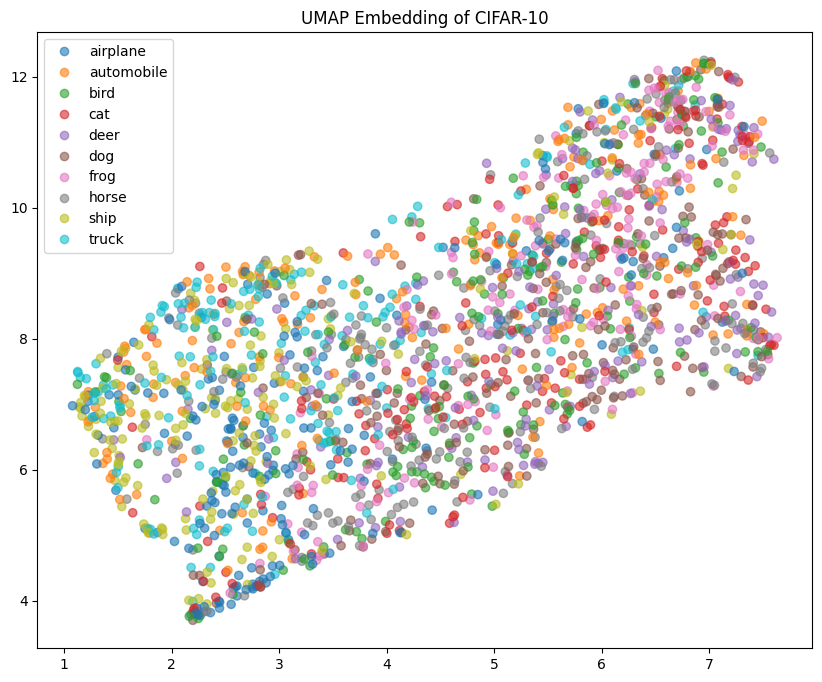

In [10]:
!pip install umap-learn
from umap import UMAP
umap_embedding = UMAP(n_components=2).fit_transform(data_subset)
plot_embedding(umap_embedding, labels_subset, 'UMAP Embedding of CIFAR-10')


**Discussion**

In this notebook, I compared different manifold learning algorithms for visualizing the CIFAR-10 dataset in 2D. Each algorithm has its own strengths and weaknesses, and the choice of algorithm depends on the specific characteristics of the dataset and the goals of the analysis. For example, PCA is a linear technique that is fast and simple, but it may not capture the nonlinear relationships in the data. On the other hand, t-SNE and UMAP are nonlinear techniques that are better at preserving local structures, but they can be more computationally intensive and sensitive to hyperparameters.

**Conclusion**

Manifold learning is a powerful tool for dimensionality reduction and visualization of high-dimensional datasets. In this notebook, I explored several different manifold learning algorithms and applied them to the CIFAR-10 dataset. Each algorithm provided a unique perspective on the data, highlighting different aspects of its structure. Future work could involve exploring other dimensionality reduction techniques, experimenting with different hyperparameters, or applying these methods to other datasets.